In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
p_list = [100, 500]
rng = np.random.default_rng(42)
X = rng.standard_normal(max(p_list) ** 2 * 2)

NOTA: AQÚ HAY QUE AJUSTAR PARA VARIOS VALORES DE C QUE AQUÍ LE LLAMA RHO 

DEJAR SIGMA2 = 1

Text(0.5, 1.0, 'Empirical evidence for n=1000, p=500, rho=0.5')

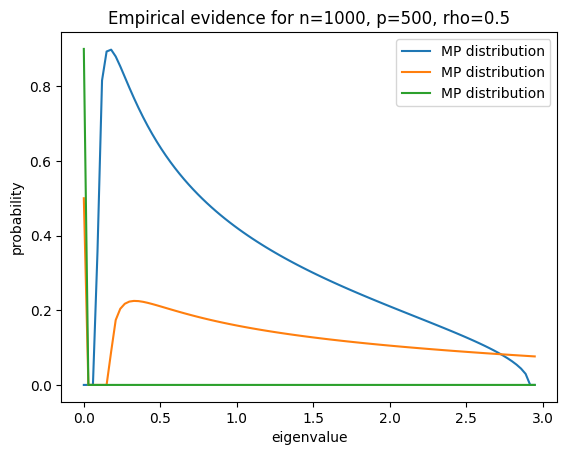

In [8]:
def marchenko_pastur_mu(x, rho, sigma2=1):
    x = np.atleast_1d(x).astype(float)
    rho_p = sigma2 * (1 + np.sqrt(rho)) ** 2
    rho_m = sigma2 * (1 - np.sqrt(rho)) ** 2
    mu = np.zeros_like(x)
    is_nonzero = (rho_m < x) & (x < rho_p)
    x_valid = x[is_nonzero]
    factor = 1 / (2 * np.pi * sigma2 * rho)
    mu[is_nonzero] = factor / x_valid
    mu[is_nonzero] *= np.sqrt((rho_p - x_valid) * (x_valid - rho_m))
    if rho > 1:
        mu[x == 0] = 1 - 1 / rho
    return mu

fig, ax = plt.subplots()

n, p = 1000, 500
A = X.reshape(n, p)
Y = 1/n * A.T @ A
eigenvals, _ = np.linalg.eig(Y)
#ax.hist(eigenvals.real, bins=50, density=True, label="histogram")
x = np.linspace(0, np.max(eigenvals.real), 100)
ax.plot(x, marchenko_pastur_mu(x, rho=p/n), label="MP distribution")
ax.plot(x, marchenko_pastur_mu(x, rho=10000/5000), label="MP distribution")
ax.plot(x, marchenko_pastur_mu(x, rho=5000/500), label="MP distribution")
ax.legend()
ax.set_xlabel("eigenvalue")
ax.set_ylabel("probability")
ax.set_title("Empirical evidence for n=1000, p=500, rho=0.5")